# LING 242 Python Lecture 2: Corpora

* Some (circularly defined) terminology
* Corpora in NLTK
* NLTK corpus readers
* Annotations
* Other corpora and annotations
* Which corpus?

## Some (circularly defined) terminology

* Corpus: a collection of documents
* Document (D): a sequence of word tokens
* Token: a particular instance of a type in a document
* Type: a distinct word form, often appearing in multiple tokens across documents, corpora
* Lexicon: a collection of word types, possibly with associated information
* Vocabulary (V): a list of all word types in a corpus
* *n*-grams: a fixed length sequence of words (unigram, bigram, trigram, 4-gram,...). $n$-grams also have type/token distinction


Let's look at tokens, types, and vocabulary in the first corpus ever: the Brown corpus

In [1]:
!python3 -m pip install --user nltk

In [2]:
import nltk
nltk.download("brown")
from nltk.corpus import brown

[nltk_data] Downloading package brown to /Users/jungyeul/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [3]:
print(brown.words()[:10])

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of']


In [4]:
print(len(brown.words()))

1161192


In [5]:
len(brown.words())

1161192

In [6]:
types = set(brown.words())
print(len(list(types)))

56057


In [7]:
list(types)[:10]

['Lloyd',
 'recondite',
 'Perhaps',
 'Cohen',
 'fern',
 '2:34.2',
 'propagation',
 ']',
 'sergeant',
 'Deciding']

In [8]:
len(types)

56057

Lists are used to store multiple items in a single variable.

In [9]:
fruits = []
fruits.append("orange")
fruits

['orange']

In [10]:
fruits = ['apple', 'banana', 'cherry']
fruits.append("orange")
fruits

['apple', 'banana', 'cherry', 'orange']

In [11]:
fruits = ['apple', 'banana', 'cherry']
fruits.insert(1, "orange")
fruits

['apple', 'orange', 'banana', 'cherry']

An important statistical property shared by all natural language corpora: Most of the tokens come from a small set of common types, and most of the vocabulary consists of rare types.


In [12]:
import pylab
import collections

lowered = []
for word in brown.words():
    lowered.append(word.lower())

counts = collections.Counter(lowered)
counts

Counter({'the': 69971,
         'fulton': 17,
         'county': 155,
         'grand': 48,
         'jury': 67,
         'said': 1961,
         'friday': 60,
         'an': 3740,
         'investigation': 51,
         'of': 36412,
         "atlanta's": 4,
         'recent': 179,
         'primary': 96,
         'election': 77,
         'produced': 90,
         '``': 8837,
         'no': 2139,
         'evidence': 204,
         "''": 8789,
         'that': 10594,
         'any': 1344,
         'irregularities': 8,
         'took': 426,
         'place': 570,
         '.': 49346,
         'further': 218,
         'in': 21337,
         'term-end': 1,
         'presentments': 1,
         'city': 393,
         'executive': 55,
         'committee': 168,
         ',': 58334,
         'which': 3561,
         'had': 5133,
         'over-all': 35,
         'charge': 122,
         'deserves': 16,
         'praise': 17,
         'and': 28853,
         'thanks': 37,
         'atlanta': 35,
      

In [13]:
counts = collections.Counter(word.lower() for word in brown.words())
len(counts)

49815

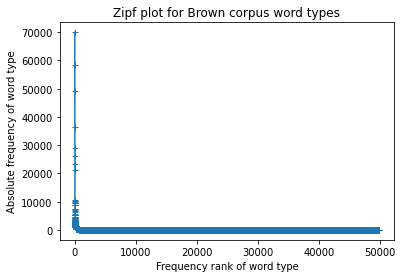

In [14]:
import pylab
from collections import Counter


counts = Counter(word.lower() for word in brown.words())

ranks = range(0, len(counts))
frequencies = sorted(counts.values(),reverse=True)[:len(counts)]
pylab.plot(ranks, frequencies, marker="+")
pylab.title("Zipf plot for Brown corpus word types")

pylab.xlabel("Frequency rank of word type")
pylab.ylabel("Absolute frequency of word type")
pylab.show()
    

In [15]:
counts = Counter(word.lower() for word in brown.words())

def print_zipf(top_n=len(counts)):
    ranks = range(0, top_n)
    frequencies = sorted(counts.values(),reverse=True)[:top_n]
    pylab.plot(ranks, frequencies, marker="+")
    pylab.title("Zipf plot for Brown corpus word types")

    pylab.xlabel("Frequency rank of word type")
    pylab.ylabel("Absolute frequency of word type")
    pylab.show()
    

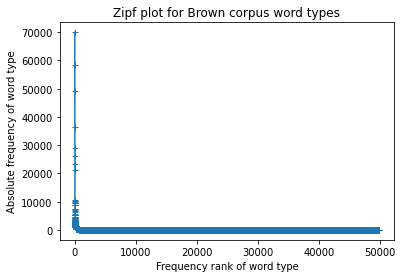

In [16]:
print_zipf()

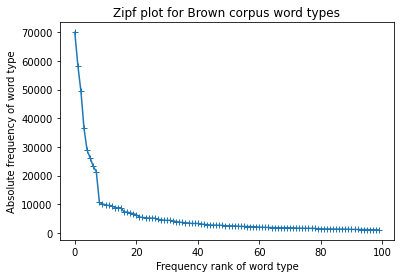

In [17]:
print_zipf(top_n=100)

One upshot of *Zipf's law* is that most words have very low frequency. Let's count the number of word types that only appear once in the Brown (These types are known as *hapax legomena*).

In [18]:
hapax_count = 0
for count in counts.values():
    if count == 1:
        hapax_count += 1
hapax_count

22010

This basic fact about words and corpora has wide-ranging implications that will motivate many of the approaches to computational linguistics we talk about throughout this program!

## Corpora in NLTK

The Natural Language Toolkit or NLTK is a venerable Python package for doing computational linguistics. Though no longer a source for cutting-edge NLP tools, it is designed for learning CL concepts and we will use it in various ways during this program. One way it will be most useful to us as is an easy source of a (relatively) diverse set of publicly-available corpora.


In [19]:
import nltk

The cell below will download all the corpus mentioned in this lecture. You can also just download everything with `nltk.download("all")` though this will take a while and use a fair bit of hard disk space!

In [20]:
for corpus in ["movie_reviews", "treebank", "brown", "gutenberg", "switchboard", "sinica_treebank", "udhr2", "knbc", "reuters", "indian", "europarl_raw", "cess_esp", "alpino", "twitter_samples", "floresta", "webtext", "nps_chat", "stopwords", "punkt","universal_tagset"]:
    nltk.download(corpus)

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/jungyeul/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     /Users/jungyeul/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /Users/jungyeul/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/jungyeul/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package switchboard to
[nltk_data]     /Users/jungyeul/nltk_data...
[nltk_data]   Package switchboard is already up-to-date!
[nltk_data] Downloading package sinica_treebank to
[nltk_data]     /Users/jungyeul/nltk_data...
[nltk_data]   Package sinica_treebank is already up-to-date!
[nltk_data] Downloading package udhr2 to /Users/jungyeul/nltk_data...
[nltk_data]   Package udhr2 is already up-to-date!
[nltk_data]

Let's take a quick tour of some of the corpora available via NLTK. Other than the Brown and the Treebank, you don't need to remember the names of individual corpora, but you should have at least develop a sense of the major ways corpora can vary, in terms of

* source
* size
* genre
* time period
* annotations

One of the most popular ways to look at the contents of a corpus is a word cloud, so in addition to some basic information we are going to show you one for each corpus. In a word cloud, the size of a word reflects its frequency.

In [21]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


Here's a function that's going to give us basic info about each corpus. Note that there's a special "corpus" of common English words like ("the", "of", etc.) called _stopwords_, and we will filter these out to get a better sense of what each corpus is about.

Difference between Python's list methods `append` and `extend`

In [22]:
x = [1, 2, 3]
x.append([4, 5])
print(x)

[1, 2, 3, [4, 5]]


In [23]:
x = [1, 2, 3]
x.extend([4, 5])
print(x)

[1, 2, 3, 4, 5]


In [24]:
from nltk.corpus import movie_reviews, treebank, brown, gutenberg, switchboard, sinica_treebank, udhr2, genesis, knbc, reuters, indian, europarl_raw, cess_esp, alpino, twitter_samples, floresta, webtext, nps_chat, stopwords
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

stopwords_set = stopwords.words("English")
stopwords_set.extend(["would", "could", "one", "may"])

def corpus_info(corpus):
    counter = Counter(word.lower() for word in corpus.words())
    print("Total tokens:", sum(list(counter.values())))
    print("Vocabulary size:", len(counter))
    print("Number of documents:", len(corpus.fileids()))
    print("Wordcloud:")
    wordcloud = WordCloud(stopwords = stopwords_set).generate(" ".join(corpus.words()))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
          
    

### [The Brown Corpus](https://en.wikipedia.org/wiki/Brown_Corpus)

* The original corpus linguistics corpus (Kučera and Francis 1967)
* First major machine-readable corpus
* 500 documents
* "Balanced" corpus of 15 text genres, used in studies of genre
* Huge at the time, now a bit small!



Total tokens: 1161192
Vocabulary size: 49815
Number of documents: 500
Wordcloud:


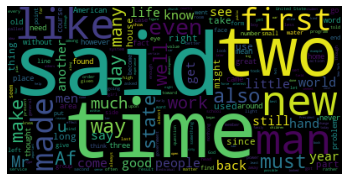

In [25]:
corpus_info(brown)

### [The Penn Treebank](https://catalog.ldc.upenn.edu/LDC99T42)

* Primarily Wall Street Journal articles from 1989
* 2500 documents in total
* Only a ~200 document sample in NLTK, full version requires LDC subscription
* The first large corpus with parse trees, used extensively for parsing and syntactic analysis


Total tokens: 100676
Vocabulary size: 11387
Number of documents: 199
Wordcloud:


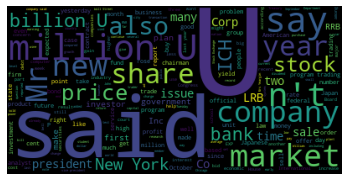

In [26]:
corpus_info(treebank)

### [Switchboard corpus](https://catalog.ldc.upenn.edu/LDC97S62)

* 36 transcribed telephone conversations
* Calls between strangers in 1990-1
* Useful for study of dialogue acts


Total tokens: 82792
Vocabulary size: 4376
Number of documents: 1
Wordcloud:


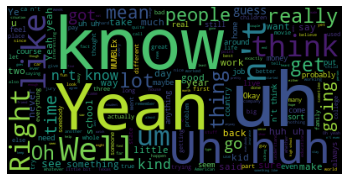

In [27]:
corpus_info(switchboard)

### Gutenberg

* Out of copyright documents from [Project Gutenberg](https://www.gutenberg.org/)
* Mostly classic literature from before 1900
* NLTK just has a small sample, but tens of thousands available

Total tokens: 2621613
Vocabulary size: 42339
Number of documents: 18
Wordcloud:


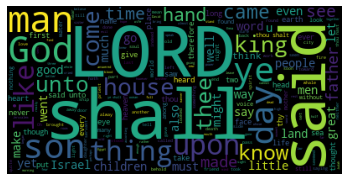

In [28]:
corpus_info(gutenberg)

### Internet-derived copora

* 2000 movie reviews from a IMDB newsgroup (movie_reviews)
* 10K IM chat posts (nps_chat)
* Collection of various text from the web (webtext)
* Sample of tweets (twitter_samples)

Total tokens: 1583820
Vocabulary size: 39768
Number of documents: 2000
Wordcloud:


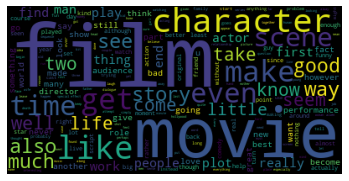

In [29]:
corpus_info(movie_reviews)

### Non-English Corpora

* Balanced corpus of Chinese (sinica_treebank)
* Japanese blogs (knbc)
* Samples from various Indian languages (indian)
* News articles from Spanish languages (cess_esp,cess_cat)
* Portuguese (floresta)
* Dutch (alpino)
* Europearn parliment proceedings (europarl_raw)
* Universal declaration of human rights in 300+ languages

Total tokens: 91627
Vocabulary size: 17273
Number of documents: 1
Wordcloud:


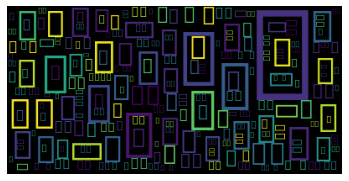

In [30]:
corpus_info(sinica_treebank)

## NLTK corpus readers


Most of the corpora in NLTK have *corpus readers* (code which converts raw text files to Python data structures) which conform to a single unified standard.

The simplest way to access a corpus is by iterating over the tokens using the `words()` method. Each word is a string.

In [31]:
for word in brown.words():
    print(word)
    if word == "that":
        break

The
Fulton
County
Grand
Jury
said
Friday
an
investigation
of
Atlanta's
recent
primary
election
produced
``
no
evidence
''
that


Most corpora are divided into sentences, which for NLTK corpora can be accessed iteratively using `sents()` method. Sentences are a lists of words. Some corpora (like the Brown) also have paragraphs (`paras()`), which are lists of sentences.

In [32]:
for sent in brown.sents():
    print(len(sent))
    if len(sent) > 25:
        print(sent)
        break

25
43
['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']


Let's print out all the sentences in the Brown that contain some particular word, your choice (but nothing too common or too rare)!

In [33]:
for sent in brown.sents():
    if "Jazz" in sent:
        print("Jazz: ", sent)
    elif "jazz" in sent:
        print("jazz: ", sent)

jazz:  ['But', 'she', 'does', 'indicate', 'festivities', 'will', 'start', 'early', ',', 'that', 'a', 'jazz', 'combo', 'will', '``', 'give', 'with', 'the', 'Basin', 'Street', 'beat', "''", 'during', 'the', 'cocktail', 'and', 'dinner', 'hours', 'and', 'that', 'Lester', "Lanin's", 'orchestra', 'will', 'take', 'over', 'during', 'the', 'dancing', '.']
jazz:  ['He', 'skips', 'around', 'from', 'jazz', ',', 'to', 'blues', 'to', 'boogie', '--', 'accompanying', 'himself', 'on', 'piano', 'and', 'frequently', 'pulling', 'the', 'customers', 'in', 'on', 'the', 'act', '.']
jazz:  ['Television', 'has', 'yet', 'to', 'work', 'out', 'a', 'living', 'arrangement', 'with', 'jazz', ',', 'which', 'comes', 'to', 'the', 'medium', 'more', 'as', 'an', 'uneasy', 'guest', 'than', 'as', 'a', 'relaxed', 'member', 'of', 'the', 'family', '.']
jazz:  ['There', 'seems', 'to', 'be', 'an', 'unfortunate', 'assumption', 'that', 'an', 'hour', 'of', 'Chicago-style', 'jazz', 'in', 'prime', 'evening', 'time', ',', 'for', 'exampl

jazz:  ['There', 'is', 'hardly', 'a', 'jazz', 'guitarist', 'in', 'the', 'business', 'today', 'who', "doesn't", 'owe', 'something', 'to', 'Django', '.']
jazz:  ['He', 'told', 'once', 'of', 'how', 'he', 'switched', 'his', 'style', 'of', 'playing', 'to', 'jazz', 'after', 'listening', 'to', 'two', 'old', 'Armstrong', 'records', 'he', 'bought', 'in', 'the', 'Flea', 'Market', 'in', 'Paris', '.']
jazz:  ['It', 'was', 'the', 'first', 'jazz', 'he', 'had', 'heard', '.']
jazz:  ['And', 'this', 'was', 'before', 'he', 'began', 'to', 'play', 'his', 'startlingly', 'beautiful', 'jazz', '.']
jazz:  ['He', 'is', 'one', 'of', 'the', 'few', 'men', 'in', 'history', 'who', 'plays', 'jazz', 'on', 'a', 'violin', '.']
jazz:  ['Kid', 'Ory', ',', 'the', 'trombonist', 'chicken', 'farmer', ',', 'is', 'also', 'one', 'of', 'the', 'solid', 'anchor', 'points', 'of', 'jazz', '.']
Jazz:  ['Good', 'Time', 'Jazz', 'has', 'released', 'a', 'nice', 'two-record', 'album', 'which', 'he', 'made', '.']
Jazz:  ['The', 'set', 'con

Jazz:  ['I', 'said', ',', 'referring', 'to', 'the', 'pretentious', '``', 'Jazz', 'Concert', "''", '.']
jazz:  ['Similarly', ',', 'the', 'innovations', 'of', 'bop', ',', 'and', 'of', 'Parker', 'particularly', ',', 'have', 'been', 'vastly', 'overrated', 'by', 'people', 'unfamiliar', 'with', 'music', ',', 'especially', 'by', 'that', 'ignoramus', ',', 'the', 'intellectual', 'jitterbug', ',', 'the', 'jazz', 'aficionado', '.']
jazz:  ['And', 'there', 'is', 'less', 'rhythmic', 'difference', 'between', 'progressive', 'jazz', ',', 'no', 'matter', 'how', 'progressive', ',', 'and', 'Dixieland', ',', 'than', 'there', 'is', 'between', 'two', 'movements', 'of', 'many', 'conventional', 'symphonies', '.']
jazz:  ['What', 'Parker', 'and', 'his', 'contemporaries', '--', 'Gillespie', ',', 'Davis', ',', 'Monk', ',', 'Roach', '(', 'Tristano', 'is', 'an', 'anomaly', ')', ',', 'etc.', '--', 'did', 'was', 'to', 'absorb', 'the', 'musical', 'ornamentation', 'of', 'the', 'older', 'jazz', 'into', 'the', 'basic', 

For many applications, you want to be able to iterate over the documents. Using NLTK, this is a two step process: first, you to get a list of the files using the `fileids()` method. Then you call the appropriate method from those mentioned above with the fileid you want as the argument.

In [34]:
for filename in brown.fileids():
    print(brown.words(filename)[:5])

['The', 'Fulton', 'County', 'Grand', 'Jury']
['Austin', ',', 'Texas', '--', 'Committee']
['Several', 'defendants', 'in', 'the', 'Summerdale']
['Oslo', 'The', 'most', 'positive', 'element']
['East', 'Providence', 'should', 'organize', 'its']
['Plainfield', '--', 'James', 'P.', 'Mitchell']
['Resentment', 'welled', 'up', 'yesterday', 'among']
['Appointment', 'of', 'William', 'S.', 'Pfaff']
['City', 'Controller', 'Alexander', 'Hemphill', 'charged']
['Vincent', 'G.', 'Ierulli', 'has', 'been']
['Miami', ',', 'Fla.', ',', 'March']
['Austin', ',', 'Texas', '--', 'A']
['Rookie', 'Ron', 'Nischwitz', 'continued', 'his']
['Philadelphia', ',', 'Jan.', '23', '--']
['If', 'the', 'Cardinals', 'heed', 'Manager']
['Romantic', 'news', 'concerns', 'Mrs.', 'Joan']
['After', 'being', 'closed', 'for', 'seven']
['``', 'A', 'Night', 'in', 'New']
['The', 'Baltimore', 'and', 'Ohio', 'Railroad']
['London', ',', 'Feb.', '9', '--']
['St.', 'Johns', ',', 'Mich.', ',']
['Emory', "University's", 'Board', 'of', 'Truste

## Annotations

Nearly all the corpora in NLTK have some kind of annotation associated with them. One common annotation is some kind of label for documents in the corpus. In the Brown, for instance, the label is associated with the genre, and for the Movie Review corpus it is the polarity (positive or negative) of the review. A list of categories is available using the `categories()` method

In [35]:
print(brown.categories())
print(movie_reviews.categories())

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']
['neg', 'pos']


In order to get text from a particular category, you can use the `categories` keyword for `words()`/`sents()/...`.

In [36]:
for sent in brown.sents(categories="religion")[:5]:
    print(sent)

['As', 'a', 'result', ',', 'although', 'we', 'still', 'make', 'use', 'of', 'this', 'distinction', ',', 'there', 'is', 'much', 'confusion', 'as', 'to', 'the', 'meaning', 'of', 'the', 'basic', 'terms', 'employed', '.']
['Just', 'what', 'is', 'meant', 'by', '``', 'spirit', "''", 'and', 'by', '``', 'matter', "''", '?', '?']
['The', 'terms', 'are', 'generally', 'taken', 'for', 'granted', 'as', 'though', 'they', 'referred', 'to', 'direct', 'and', 'axiomatic', 'elements', 'in', 'the', 'common', 'experience', 'of', 'all', '.']
['Yet', 'in', 'the', 'contemporary', 'context', 'this', 'is', 'precisely', 'what', 'one', 'must', 'not', 'do', '.']
['For', 'in', 'the', 'modern', 'world', 'neither', '``', 'spirit', "''", 'nor', '``', 'matter', "''", 'refer', 'to', 'any', 'generally', 'agreed-upon', 'elements', 'of', 'experience', '.']


If you want to iterate over documents, you can also get fileids for that category using the category as an argument to fileids, and then  use `words()`/`sents()`

In [37]:
for filename in brown.fileids("religion"):
    print(brown.words(filename))

['As', 'a', 'result', ',', 'although', 'we', 'still', ...]
['If', 'the', 'content', 'of', 'faith', 'is', 'to', ...]
['One', 'hundred', 'years', 'ago', 'there', 'existed', ...]
['The', 'death', 'of', 'a', 'man', 'is', 'unique', ',', ...]
['Furthermore', ',', 'as', 'an', 'encouragement', 'to', ...]
['I', 'have', ',', 'within', 'the', 'past', 'fifty', ...]
['``', 'The', 'Lord', 'is', 'my', 'light', 'and', 'my', ...]
['But', ',', 'again', ',', 'we', 'have', 'no', 'real', ...]
['Few', 'persons', 'who', 'join', 'the', 'Church', ...]
['Men', 'need', 'unity', 'and', 'they', 'need', 'God', ...]
['When', 'they', 'say', 'that', 'under', 'no', ...]
['Much', 'more', 'than', 'shelter', ',', 'housing', ...]
['If', 'we', 'look', 'about', 'the', 'world', 'today', ...]
['To', 'what', 'extent', 'and', 'in', 'what', 'ways', ...]
['Individuals', 'possessing', 'unusual', 'gifts', ...]
['Pope', 'Leo', '13', ',', 'on', 'the', '13th', 'day', ...]
['I', 'am', 'a', 'magazine', ';', ';', 'my', 'name', ...]


Or you can iterate through all the texts and look up the category for a particular fileid using `categories(fileid)`.

In [38]:
for fileid in brown.fileids():
    print(fileid)
    print(brown.categories(fileid))

ca01
['news']
ca02
['news']
ca03
['news']
ca04
['news']
ca05
['news']
ca06
['news']
ca07
['news']
ca08
['news']
ca09
['news']
ca10
['news']
ca11
['news']
ca12
['news']
ca13
['news']
ca14
['news']
ca15
['news']
ca16
['news']
ca17
['news']
ca18
['news']
ca19
['news']
ca20
['news']
ca21
['news']
ca22
['news']
ca23
['news']
ca24
['news']
ca25
['news']
ca26
['news']
ca27
['news']
ca28
['news']
ca29
['news']
ca30
['news']
ca31
['news']
ca32
['news']
ca33
['news']
ca34
['news']
ca35
['news']
ca36
['news']
ca37
['news']
ca38
['news']
ca39
['news']
ca40
['news']
ca41
['news']
ca42
['news']
ca43
['news']
ca44
['news']
cb01
['editorial']
cb02
['editorial']
cb03
['editorial']
cb04
['editorial']
cb05
['editorial']
cb06
['editorial']
cb07
['editorial']
cb08
['editorial']
cb09
['editorial']
cb10
['editorial']
cb11
['editorial']
cb12
['editorial']
cb13
['editorial']
cb14
['editorial']
cb15
['editorial']
cb16
['editorial']
cb17
['editorial']
cb18
['editorial']
cb19
['editorial']
cb20
['editorial']
cb21

Another extremely common annotation is a part-of-speech (POS) tag. In NLTK, POS tags are accessed using by using `tagged_words()` and `tagged_sents()`. The difference between these methods and their non-tagged equivalent is the string corresponding to a word token is replaced with a (token,POS) *tuple*.

In [39]:
brown.tagged_words()[0]

('The', 'AT')

In [40]:
first_tagged_sent = brown.tagged_sents()[0]
first_tagged_sent

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.')]

When iterating over tuples, don't forget you can extract the elements in the header of the `for` loop! 

In [41]:
for word, pos in first_tagged_sent:
    print(pos) 

AT
NP-TL
NN-TL
JJ-TL
NN-TL
VBD
NR
AT
NN
IN
NP$
JJ
NN
NN
VBD
``
AT
NN
''
CS
DTI
NNS
VBD
NN
.


It is worth noting that there are various different POS tag sets, even for just English. In recent years there has been a push towards a universal set that works for all languages. We can get the universal tagset by using the `tagset='universal'` keyword argument.

In [42]:
brown.tagged_sents(tagset='universal')[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

For this course, make sure you know what each tag in the [universal tag set](https://universaldependencies.org/u/pos/) means and can give examples: these are _fundamental_ linguistic concepts that anyone who works with language should know!

## Other corpora and annotations

NLTK is just a small, easy to access sample of full range of corpora out there. Here are some others, ranging for well-known and very useful to more obscure but cool! 

* The entirety of Wikipedia is [downloadable](https://en.wikipedia.org/wiki/Wikipedia:Database_download). It is popular as a raw source of language data for various languages and also has interesting annotations, for instance the page structure and the edit history! 
* The [Gigaword corpus](https://catalog.ldc.upenn.edu/LDC2012T21) is a huge newspaper corpus with lots of useful annotation, though it requires an LDC subscription
* [The British National Corpus](http://www.natcorp.ox.ac.uk/) and [American National Corpus](http://www.anc.org/) are (like the Brown) balanced corpora reflecting a diversity of language genres and modalities in their respective countries, but at a much larger scale than the Brown.
* There are lots of big corpora of online reviews, e.g. [Amazon reviews](https://snap.stanford.edu/data/web-Amazon.html)
* Questions and answers from [Yahoo answers](https://webscope.sandbox.yahoo.com/catalog.php?datatype=l&guccounter=1)
* Large corpus of [Reddit comments](https://www.kaggle.com/reddit/reddit-comments-may-2015)
* Corpus of [blogger.com blogs](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm) with user ids and background (gender/age)
* The [Cambridge Learner Corpus](https://ilexir.co.uk/datasets/index.html) written by non-native learners of English, with error annotations
* The [Enron e-mail corpus](https://aws.amazon.com/de/datasets/enron-email-data/), over a million internal e-mails of a now defunct company, used for studies of power relationships
* The [Hansards](https://www.isi.edu/natural-language/download/hansard/), proceedings of Canadian parliment, English-French parallel text used for machine translation
* The [Cornell Movie Dialogue Corpus](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html), scripts from 617 movies with character annotations
* [Jeopardy](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/) questions and answers
* ...

